# Prevendo se a seguradora Perdera Clientes


Você certamente já fez algum seguro na vida, seguro de carro, vida, imobiliario etc.. Nós vamos prever evasão de clientes da seguradora.
 
Imagina que você decide montar uma seguradora e aí voce sai adquirindo clientes então você trabalha só com seguros de vida, então voce junta lá um capital e aí voce vai correr atraz de clientes para voce oferecer seguro de vida e aí mensalmente os seus clientes vão lá depositando para você, o sinistro que é a morte do cliente ele é um negocio que está muito lá afrente as pessoas têm uma expectativa de vida de muito grande, então oque acontece é geralmente é um risco grande se o cliente morrer  a seguradora tem que desembolsar e fazer o pagamento do seguro, mais existem muitos cientistas de dados nessas instituições para fazerem os mais diversos tipos de calculos e construções de maquinas preditivas para prever exatamente  a ocasião desse sinistro e assim ele vai montando o preço.

Para uma indústria em que a aquisição e retenção de clientes são igualmente importantes, e a primeira sendo um processo mais caro, as seguradoras contam com OS DADOS para entender o comportamento do cliente e aumentar a retenção.

Assim, saber se um cliente possivelmente quer cancelar o seguro de antemão dá às seguradoras a oportunidade de criar estratégias para evitar que isso realmente aconteça

## 1° Problema de Negócio

Seu objetivo como cientista de dados é construir um modelo de aprendizado de máquina, uma Máquina Preditiva, que possa prever se a seguradora perderá um cliente ou não. Você recebe 16 variáveis anônimas (feature_0 a feature 15) que influenciam a rotatividade de clientes no setor de seguros.

In [27]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## 2° Análise Exploratória de dados

In [2]:
#IMportando os dados
dados=pd.read_csv("Train.csv")

In [3]:
#Vendo as 5 primeiras Linhas
dados.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [4]:
#Contagem de valores unicos para cada variavel
dados.nunique()

feature_0       77
feature_1     6434
feature_2       31
feature_3     1482
feature_4       47
feature_5      517
feature_6       36
feature_7       12
feature_8        3
feature_9        4
feature_10       2
feature_11       2
feature_12       2
feature_13       3
feature_14      12
feature_15       4
labels           2
dtype: int64

In [5]:
#Verificar valores NAN
dados.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [6]:
#Verificar registos duplicados
dados.duplicated().sum()

0

In [7]:
#Dados um describe

dados.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [8]:
dados["labels"].value_counts(normalize=True)

0    0.883007
1    0.116993
Name: labels, dtype: float64

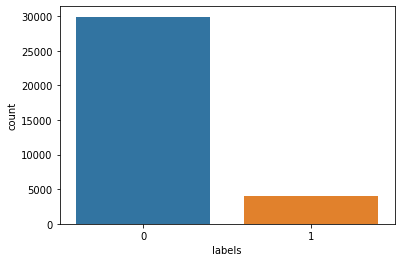

In [9]:
sns.countplot(dados["labels"]);

<AxesSubplot:xlabel='feature_2'>

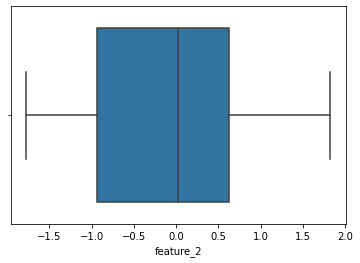

In [10]:
dados["feature_2"].value_counts(normalize=True)
sns.boxplot(dados["feature_2"])

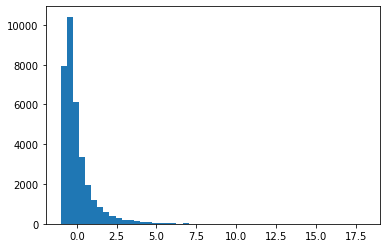

In [11]:
dados["feature_3"].value_counts(normalize=True)
plt.hist(dados["feature_3"],bins=50);

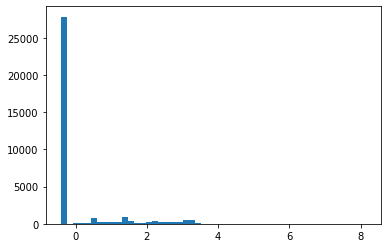

In [12]:
dados["feature_5"].value_counts(normalize=True)
plt.hist(dados["feature_5"],bins=50);

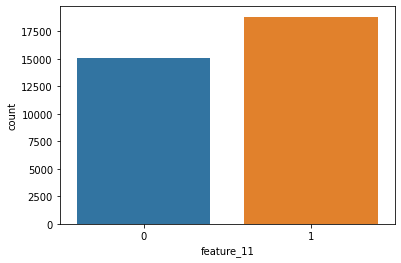

In [13]:
dados["feature_11"].value_counts(normalize=True)
sns.countplot(dados["feature_11"]);

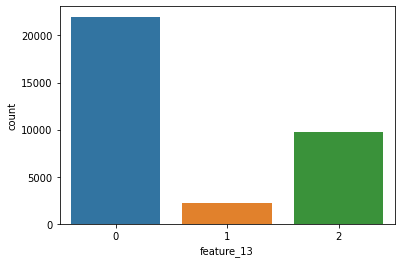

In [14]:
dados["feature_13"].value_counts(normalize=True)
sns.countplot(dados["feature_13"]);

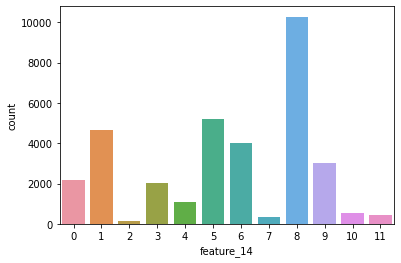

In [15]:
dados["feature_14"].value_counts(normalize=True)
sns.countplot(dados["feature_14"]);

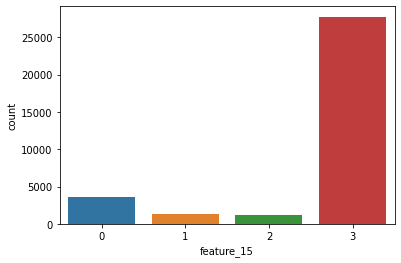

In [16]:
dados["feature_15"].value_counts(normalize=True)
sns.countplot(dados["feature_15"]);

In [17]:
corr=dados.corr()


<AxesSubplot:>

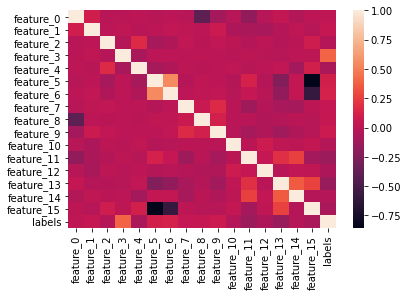

In [19]:
sns.heatmap(corr)

## 3° Pré-Processamento dos Dados

**Balanceamento da Classe**

O conjunto de dados está altamente desbalanceado e precisa de tratamento. Vamos usar uma Hiperparâmetro do Algoritmo ao invés de usar funções específicas como o SMOTE.

### Seleção das Variáveis - Feature Select

In [20]:
#Separar os valores para realizar  o treinamento
array=dados.values

In [21]:
array

array([[-2.76514595e-01, -4.24428814e-01,  1.34499695e+00, ...,
         1.00000000e+01,  2.00000000e+00,  1.00000000e+00],
       [ 8.53573137e-01,  1.50991259e-01,  5.03891812e-01, ...,
         0.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       [ 9.47747115e-01, -1.73832058e-01,  1.82562845e+00, ...,
         5.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.00733785e-03, -3.95526436e-01,  9.84523317e-01, ...,
         7.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       [-8.81666398e-02,  7.89142630e-01,  5.03891812e-01, ...,
         9.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       [ 9.47747115e-01, -4.06364828e-01, -9.38002703e-01, ...,
         8.00000000e+00,  3.00000000e+00,  0.00000000e+00]])

In [22]:
# Separando o array em componentes de input e output (variáveis explicativas e Target(Y))
#Ou seja estamos separando as variaveis que iremos usar
X=array[:,[2,3,5,11,13,14,15]]
Y=array[:,16]

In [25]:
# Definindo o tamanho dos dados de treino e de teste
teste_size=0.38
seed=7

In [31]:
#Criando o dataset de treinio e de teste

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=teste_size,random_state=seed)

### 4° Construíndo a Máquina Preditiva

In [32]:
modelo_lgbm=lgb.LGBMClassifier(
                                n_estimators=95,
                                learning_rate=0.1,
                                scale_pos_weight=3,
                                random_state=7)

In [33]:
modelo_lgbm.fit(x_train,y_train)

LGBMClassifier(n_estimators=95, random_state=7, scale_pos_weight=3)

In [34]:
y_pred=modelo_lgbm.predict(x_test)

In [35]:
y_pred_proba=modelo_lgbm.predict_proba(x_test)

In [36]:
y_pred[:5]

array([0., 1., 0., 0., 0.])

In [37]:
y_pred_proba[:5]

array([[9.85804312e-01, 1.41956878e-02],
       [3.05642525e-01, 6.94357475e-01],
       [9.95053370e-01, 4.94663003e-03],
       [9.80264471e-01, 1.97355293e-02],
       [9.99128430e-01, 8.71570164e-04]])

In [38]:
previsoes=[round(value) for value in y_pred]

In [40]:
#previsoes

In [41]:
accuracy=accuracy_score(y_test,previsoes)

In [43]:
print("Acurácia: %.2f%%"%(accuracy*100.0))

Acurácia: 89.59%


In [44]:
f1=f1_score(y_test,previsoes)

In [45]:
f1

0.6286662977310459